In [133]:
# Importando Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [134]:
# Carregar os dados do arquivo CSV
df = pd.read_csv('dadosacoes.csv')

In [135]:
# Verificando informações gerais do DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB
None


In [136]:
# Descrição estatística dos dados numéricos
print(df.describe())

       preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)
count     100.000000  100.000000                       100.00000
mean      136.140000   52.010000                      2433.70000
std        75.237942   27.475791                      1397.29373
min        15.000000    2.000000                        52.00000
25%        67.000000   28.250000                      1189.25000
50%       121.500000   55.500000                      2433.00000
75%       209.000000   76.500000                      3616.50000
max       253.000000   97.000000                      4993.00000


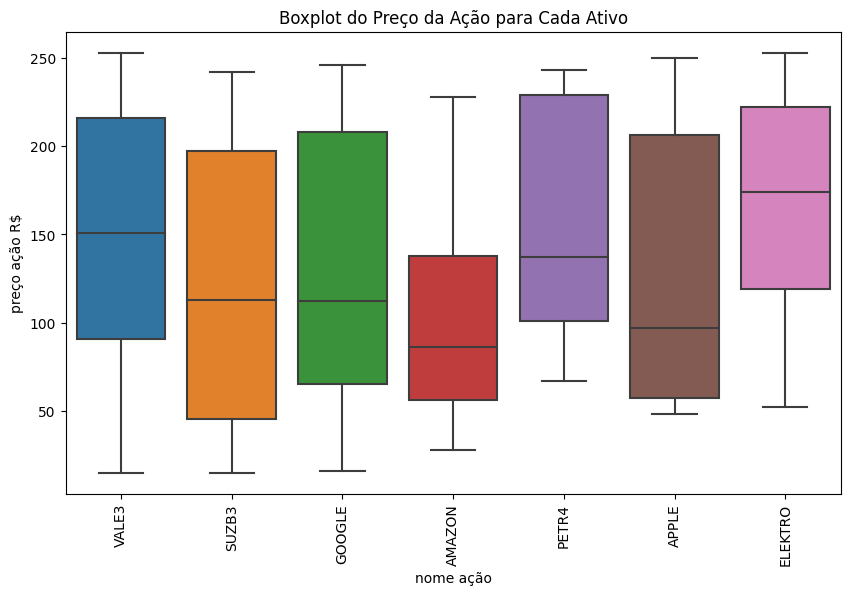

In [137]:
# Plotando boxplot para preço da ação
plt.figure(figsize=(10, 6))
sns.boxplot(x='nome ação', y='preço ação R$', data=df)
plt.xticks(rotation=90)
plt.title('Boxplot do Preço da Ação para Cada Ativo')
plt.show()

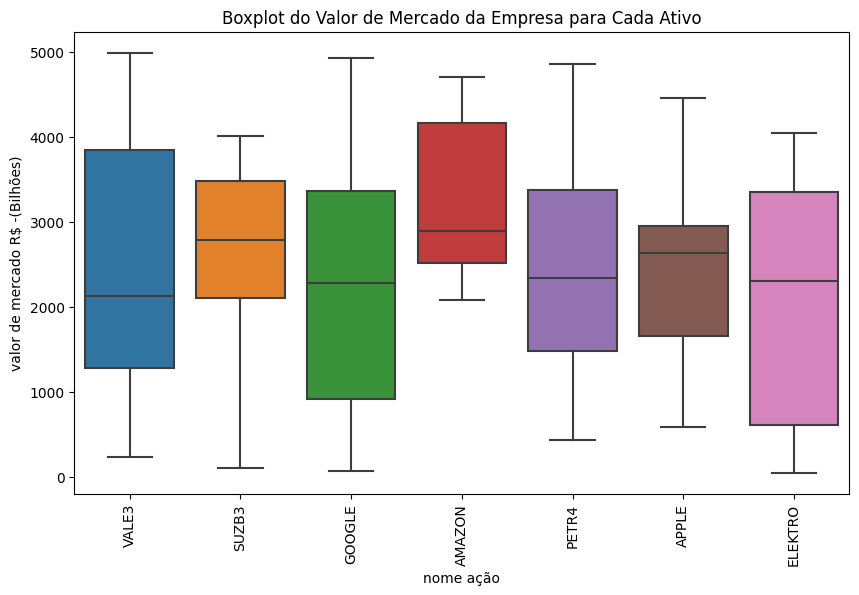

In [138]:
# Plotando boxplot para valor de mercado da empresa
plt.figure(figsize=(10, 6))
sns.boxplot(x='nome ação', y='valor de mercado R$ -(Bilhões)', data=df)
plt.xticks(rotation=90)
plt.title('Boxplot do Valor de Mercado da Empresa para Cada Ativo')
plt.show()

In [139]:
# 1 Verificar se há valores ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())


Valores ausentes por coluna:
nome ação                         0
preço ação R$                     0
qtde cotas                        0
valor de mercado R$ -(Bilhões)    0
dtype: int64


In [140]:
# 2. Codificar a variável categórica 'nome ação' com pd.get_dummies
# Aplicar get_dummies para a coluna 'nome ação'
df_encoded = pd.get_dummies(df, columns=['nome ação'], drop_first=True)


In [141]:
# 3. Se houver colunas numéricas que precisam de normalização, aplicamos o StandardScaler
# Selecionando apenas as colunas numéricas
numerical_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns

In [142]:
# Criando um objeto StandardScaler
scaler = StandardScaler()

In [143]:
# Verificando colunas não numéricas
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns
print(non_numeric_cols)

Index(['nome ação'], dtype='object')


In [144]:
# Selecionando apenas as colunas numéricas (float64 e int64)
colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Preenchendo os valores ausentes com a média de cada coluna numérica
df[colunas_numericas] = df[colunas_numericas].apply(lambda x: x.fillna(x.mean()))

# Exibindo o DataFrame após o preenchimento
print(df)

   nome ação  preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)
0      VALE3            194          45                            2134
1      SUZB3             91          71                            3069
2      SUZB3            165          41                            2815
3      SUZB3             56          34                            3613
4     GOOGLE            212           9                            2975
..       ...            ...         ...                             ...
95     SUZB3            208          78                            3035
96     VALE3            253          60                            3263
97    GOOGLE             99          35                             980
98     VALE3             82          43                            1866
99     VALE3            111          19                             230

[100 rows x 4 columns]


In [145]:

#Para o seu pedido, irei fornecer um código completo que abrange as etapas descritas, incluindo o pré-processamento dos dados e a aplicação do algoritmo K-Means com diferentes valores de clusters. O código também inclui a geração de gráficos de avaliação do modelo (cotovelo e silhueta) e a visualização dos clusters formados, tanto em 2D quanto 3D.

#1. Pré-processamento dos dados
#Vamos começar realizando o pré-processamento necessário, incluindo o tratamento de valores ausentes e a codificação de variáveis categóricas.

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [146]:
# Exemplo de DataFrame com variáveis categóricas e valores ausentes
data = {
    'acao': ['VALE3', 'PETR4', 'AMAZON', 'GOOGLE', 'APPLE'],
    'preco_acao': [85.5, 29.7, 145.8, 2800, 146.8],
    'quantidade_cotas': [5000, 2000, 1500, 1000, 1200],
    'valor_mercado': [100000, 80000, 250000, 500000, 300000],
    'categoria': ['Tecnologia', 'Energia', 'Tecnologia', 'Tecnologia', 'Tecnologia']
}

df = pd.DataFrame(data)

In [147]:
# 1. Lidar com valores ausentes (supondo que não há valores ausentes neste exemplo)
# df.fillna(df.mean(), inplace=True)  # Se houvesse valores ausentes, você poderia preencher com a média

# 2. Codificar variáveis categóricas usando pd.get_dummies
df_codificado = pd.get_dummies(df, columns=['categoria'], drop_first=True)

# Exibindo o DataFrame após a codificação
print(df_codificado)

     acao  preco_acao  quantidade_cotas  valor_mercado  categoria_Tecnologia
0   VALE3        85.5              5000         100000                  True
1   PETR4        29.7              2000          80000                 False
2  AMAZON       145.8              1500         250000                  True
3  GOOGLE      2800.0              1000         500000                  True
4   APPLE       146.8              1200         300000                  True


NORMALIZAÇÃO DE DADOS

In [148]:
# Selecionando as colunas numéricas para normalização
features = df_codificado[['preco_acao', 'quantidade_cotas', 'valor_mercado', 'categoria_Tecnologia']]

# Normalizando os dados
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Exibindo as primeiras linhas após normalização
print(pd.DataFrame(features_scaled, columns=features.columns).head())

   preco_acao  quantidade_cotas  valor_mercado  categoria_Tecnologia
0   -0.514826          1.946705      -0.957218                   0.5
1   -0.566488         -0.095293      -1.088343                  -2.0
2   -0.458998         -0.435626       0.026225                   0.5
3    1.998384         -0.775959       1.665296                   0.5
4   -0.458072         -0.639826       0.354039                   0.5


Aplicando K-Means com Diferentes Valores de Clusters

In [149]:
# Aplicando K-Means com 4 clusters (definindo n_init explicitamente)
kmeans_4 = KMeans(n_clusters=4, n_init=10, random_state=42)
df_codificado['cluster_4'] = kmeans_4.fit_predict(features_scaled)

# Exibindo os clusters formados
print(df_codificado[['acao', 'cluster_4']])

     acao  cluster_4
0   VALE3          2
1   PETR4          0
2  AMAZON          1
3  GOOGLE          3
4   APPLE          1


In [152]:
# Aplicando K-Means com 5 clusters (definindo n_init explicitamente)
kmeans_5 = KMeans(n_clusters=5, n_init=10, random_state=42)
df_codificado['cluster_5'] = kmeans_5.fit_predict(features_scaled)

# Exibindo os clusters formados
print(df_codificado[['acao', 'cluster_5']])

     acao  cluster_5
0   VALE3          2
1   PETR4          0
2  AMAZON          4
3  GOOGLE          3
4   APPLE          1


In [157]:
# Aplicando K-Means com 8 clusters (definindo n_init explicitamente)
kmeans_8 = KMeans(n_clusters=8, n_init=10, random_state=42)
df_codificado['cluster_8'] = kmeans_5.fit_predict(features_scaled)

# Exibindo os clusters formados
print(df_codificado[['acao', 'cluster_8']])

     acao  cluster_8
0   VALE3          2
1   PETR4          0
2  AMAZON          4
3  GOOGLE          3
4   APPLE          1


Gráfico do Cotovelo (Elbow Method)